In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
batch_size = 32
image_size = 256

# Update the directory path to your dataset
dataset_path = r'C:\Users\nitis\OneDrive\Desktop\training'

# Create the dataset
dataset = keras.preprocessing.image_dataset_from_directory(
    directory=dataset_path,
    batch_size=batch_size,
    image_size=(image_size, image_size),
    shuffle=True
)

Found 2152 files belonging to 3 classes.


In [3]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [4]:
len(dataset)

68

In [5]:
93 * batch_size

2976

In [6]:
# No of images in last badge

32 - (2976 - 2948)

4

In [7]:
def train_validation_test_split(dataset, train_size=0.8, validation_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):

    dataset_batch_count = len(dataset)
    train_batch_count = int(dataset_batch_count * train_size)
    validation_test_batch_count = int(dataset_batch_count * validation_size)

    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)

    train_ds = dataset.take(train_batch_count)
    validation_ds = dataset.skip(train_batch_count).take(validation_test_batch_count)
    test_ds = dataset.skip(train_batch_count).skip(validation_test_batch_count)

    return train_ds, validation_ds, test_ds

In [8]:
train_ds, validation_ds, test_ds = train_validation_test_split(dataset)
len(train_ds), len(validation_ds), len(test_ds)

(54, 6, 8)

(256, 256, 3)
[[[206. 204. 209.]
  [203. 201. 206.]
  [198. 196. 201.]
  ...
  [188. 187. 195.]
  [186. 185. 193.]
  [185. 184. 192.]]

 [[212. 210. 215.]
  [207. 205. 210.]
  [201. 199. 204.]
  ...
  [191. 190. 198.]
  [192. 191. 199.]
  [194. 193. 201.]]

 [[206. 204. 209.]
  [202. 200. 205.]
  [198. 196. 201.]
  ...
  [189. 188. 196.]
  [194. 193. 201.]
  [198. 197. 205.]]

 ...

 [[168. 163. 169.]
  [114. 109. 115.]
  [129. 124. 130.]
  ...
  [132. 126. 136.]
  [137. 131. 141.]
  [119. 113. 123.]]

 [[141. 136. 142.]
  [153. 148. 154.]
  [127. 122. 128.]
  ...
  [107. 101. 111.]
  [114. 108. 118.]
  [157. 151. 161.]]

 [[149. 144. 150.]
  [183. 178. 184.]
  [145. 140. 146.]
  ...
  [138. 132. 142.]
  [138. 132. 142.]
  [147. 141. 151.]]]

(32,)
0



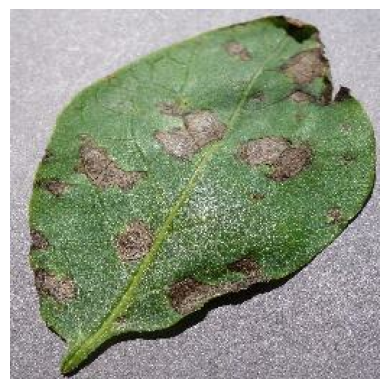

In [9]:
for image_batch, label_batch in train_ds.take(1):
    print(image_batch.numpy()[0].shape)
    print(image_batch.numpy()[0])
    print()

    print(label_batch.numpy().shape)
    print(label_batch.numpy()[0])
    print()

    plt.imshow(image_batch.numpy()[0].astype('uint8'))
    plt.axis('off')

In [10]:
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
# Build Data Pipeline

train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

In [12]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
channel = 3  # RGB
input_shape = (batch_size, image_size, image_size, channel)
target = 3  # len(class_names)

input_shape

(32, 256, 256, 3)

In [14]:
# Image Data Preprocessing

preprocessing = keras.Sequential([
                    keras.layers.Resizing(height=image_size, width=image_size),
                    keras.layers.Rescaling(scale=1./255),
                    keras.layers.RandomFlip(mode='horizontal_and_vertical'),
                    keras.layers.RandomRotation(factor=0.2)
                ])
preprocessing

<Sequential name=sequential, built=False>

In [15]:
# Define model parameters
input_shape = (256, 256, 3)  # Assuming 256x256 RGB images
target = 3  # Replace with the actual number of classes in your dataset

# Define your CNN model
model1 = keras.Sequential([
    # CNN
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # ANN
    keras.layers.Flatten(),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=target, activation='softmax')
])

model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1

<Sequential name=sequential_1, built=True>

In [17]:
history = model1.fit(train_ds,
                    batch_size=batch_size,
                    epochs=35,
                    verbose=1,
                    validation_data = validation_ds)
history

Epoch 1/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 29s 494ms/step - accuracy: 0.4670 - loss: 4.2057 - val_accuracy: 0.5208 - val_loss: 0.8110
Epoch 2/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 627ms/step - accuracy: 0.6738 - loss: 0.6816 - val_accuracy: 0.8177 - val_loss: 0.4612
Epoch 3/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 454ms/step - accuracy: 0.8383 - loss: 0.4117 - val_accuracy: 0.9219 - val_loss: 0.2040
Epoch 4/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 443ms/step - accuracy: 0.9174 - loss: 0.2192 - val_accuracy: 0.8646 - val_loss: 0.3067
Epoch 5/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 442ms/step - accuracy: 0.9436 - loss: 0.1553 - val_accuracy: 0.9479 - val_loss: 0.1850
Epoch 6/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 445ms/step - accuracy: 0.9444 - loss: 0.1585 - val_accuracy: 0.9062 - val_loss: 0.2620
Epoch 7/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 441ms/step - accuracy: 0.9536 - loss: 0.1334 - val_accuracy: 0.9271 - val_loss: 0.1993
Epoch 8/35
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 436ms/step - accuracy: 0.9497 - loss: 0.1302 - val_accu

In [18]:
model1.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.9981 - loss: 0.0039


[0.007265852298587561, 0.99609375]

In [19]:
history.params

{'verbose': 1, 'epochs': 35, 'steps': 54}

In [20]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [22]:
acc[0:5]

[0.5271990895271301,
 0.6973379850387573,
 0.8628472089767456,
 0.9184027910232544,
 0.9427083134651184]

In [23]:
len(acc), len(val_acc), len(loss), len(val_loss)

(35, 35, 35, 35)

In [24]:
model1.save('model1.h5')

Text(0.5, 1.0, 'Training vs Validation Loss')

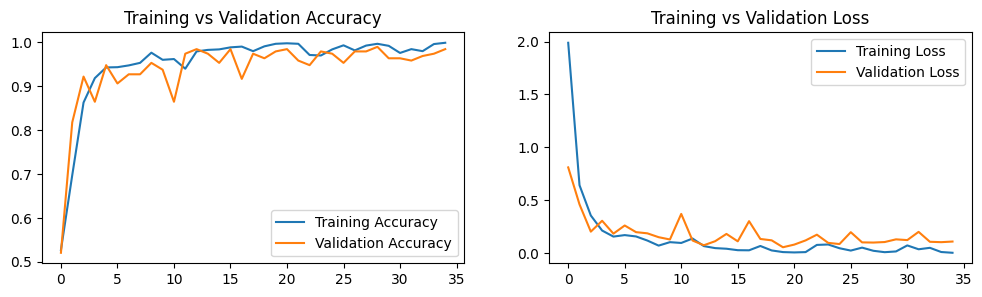

In [25]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

In [26]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [27]:
def prediction(image_path, class_names = dataset.class_names):

    img = Image.open(image_path).resize((256,256))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    model = tf.keras.models.load_model('model1.h5')
    prediction = model1.predict(img_array)

    predicted_class = class_names[np.argmax(prediction)]
    confidence = round(np.max(prediction)*100, 2)

    print(f'Predicted Class : {predicted_class}')
    print(f'Confident : {confidence}%')
    print('')
    plt.imshow(img)
    plt.axis('off')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted Class : Potato___Early_blight
Confident : 100.0%



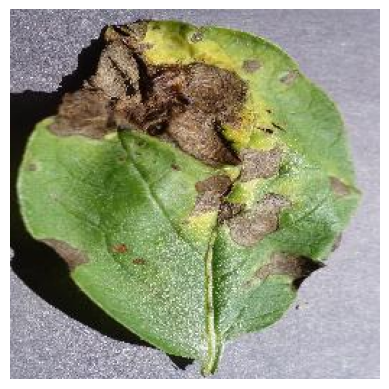

In [28]:
prediction(image_path=r"C:\Users\nitis\OneDrive\Desktop\training\Potato___Early_blight\0e0a1b51-f61c-4934-bc57-a820af1faacb___RS_Early.B 7147.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Class : Potato___Late_blight
Confident : 100.0%



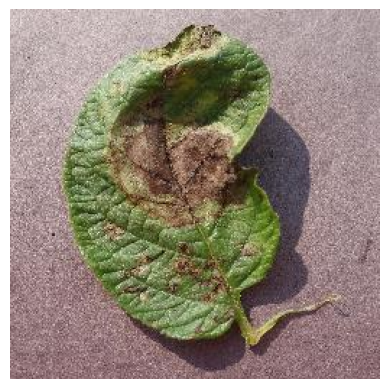

In [29]:
prediction(image_path=r"C:\Users\nitis\OneDrive\Desktop\training\Potato___Late_blight\1e0326a5-b208-447f-9d60-f788ec4b6e3f___RS_LB 4526.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted Class : Potato___healthy
Confident : 99.97%



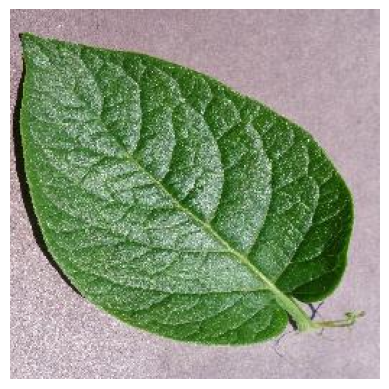

In [30]:
prediction(image_path=r"C:\Users\nitis\OneDrive\Desktop\training\Potato___healthy\3a1dbeee-089c-43f0-8f51-a92d3687a515___RS_HL 1754.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Class : Potato___Early_blight
Confident : 100.0%



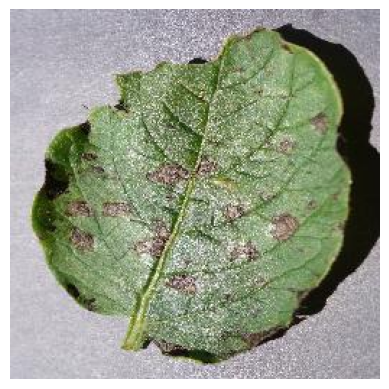

In [31]:
prediction(image_path=r"C:\Users\nitis\OneDrive\Desktop\training\Potato___Early_blight\1c42eae7-29c8-42fd-b05a-9b8255790f6f___RS_Early.B 7719.JPG")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Class : Potato___Late_blight
Confident : 100.0%



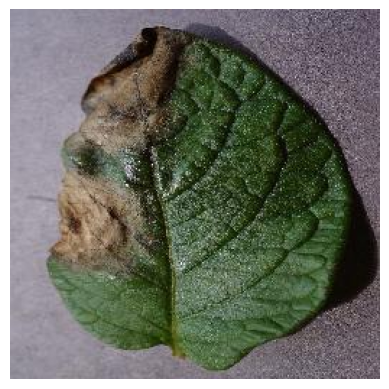

In [32]:
prediction(image_path=r"C:\Users\nitis\OneDrive\Desktop\Potato___Late_blight\01ad74ce-eb28-42c7-9204-778d17cfd45c___RS_LB 2669.JPG")